reference: https://zhuanlan.zhihu.com/p/101799677

In [24]:
import torch
torch.__version__

'1.6.0'

In [25]:
from __future__ import print_function
import torch

In [26]:
x = torch.empty(5, 3)
print(x)

tensor([[1.0469e-38, 9.3674e-39, 9.9184e-39],
        [8.7245e-39, 9.2755e-39, 8.9082e-39],
        [9.9184e-39, 8.4490e-39, 9.6429e-39],
        [1.0653e-38, 1.0469e-38, 4.2246e-39],
        [1.0378e-38, 9.6429e-39, 9.2755e-39]])


In [27]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3568, 0.1898, 0.9638],
        [0.8893, 0.9131, 0.9649],
        [0.1871, 0.2894, 0.4746],
        [0.3597, 0.4167, 0.0734],
        [0.6067, 0.8453, 0.1729]])


In [28]:
x = torch.zeros(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [29]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [30]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [31]:
import torch
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [32]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-1.6485,  0.3901, -1.5344],
        [-0.1758, -2.4787, -0.0823],
        [ 1.1017,  0.2345, -0.4665],
        [ 1.0825, -1.8110,  0.7313],
        [ 1.1274,  1.0616,  0.7046]])


In [33]:
# 獲取size
print(x.size())
torch.Size([5,3])

torch.Size([5, 3])


torch.Size([5, 3])

In [34]:
y = torch.rand(5,3)
print(x+y)

tensor([[-1.5735,  1.1917, -0.7651],
        [ 0.8087, -2.3707,  0.0809],
        [ 1.3146,  0.5293,  0.3896],
        [ 1.6812, -1.2449,  1.6115],
        [ 1.3525,  1.2751,  1.6569]])


In [35]:
# 加法2
print(torch.add(x,y))

tensor([[-1.5735,  1.1917, -0.7651],
        [ 0.8087, -2.3707,  0.0809],
        [ 1.3146,  0.5293,  0.3896],
        [ 1.6812, -1.2449,  1.6115],
        [ 1.3525,  1.2751,  1.6569]])


In [36]:
result = torch.empty(5,3)
torch.add(x, y, out = result)
print(result)

tensor([[-1.5735,  1.1917, -0.7651],
        [ 0.8087, -2.3707,  0.0809],
        [ 1.3146,  0.5293,  0.3896],
        [ 1.6812, -1.2449,  1.6115],
        [ 1.3525,  1.2751,  1.6569]])


In [37]:
# 替換, adds x to y
y.add_(x)
print(y)

tensor([[-1.5735,  1.1917, -0.7651],
        [ 0.8087, -2.3707,  0.0809],
        [ 1.3146,  0.5293,  0.3896],
        [ 1.6812, -1.2449,  1.6115],
        [ 1.3525,  1.2751,  1.6569]])


In [38]:
print(x[:, 1])

tensor([ 0.3901, -2.4787,  0.2345, -1.8110,  1.0616])


In [39]:
# torch.view与Numpy的reshape类似
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # size -1 從其他維度推斷
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [40]:
# 如果你有只有一个元素的张量，使用.item()来得到Python数据类型的数值
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.7742])
1.7742080688476562


将Torch Tensor转换成NumPy array，反之亦然，这是轻而易举的。 Torch Tensor和NumPy array将共享它们的底层内存位置，更改其中一个将更改另一个。 将Torch Tensor转换为NumPy array。

In [41]:
import torch
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [42]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [43]:
# see how the numpy array changed in value
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### NumPy Array 转化成 Torch Tensor

In [44]:
# 使用from_numpy自動轉化
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


所有的 Tensor 类型默认都是基于CPU， CharTensor 类型不支持到 NumPy 的转换.

In [45]:
# CUDA 张量. 使用.to 方法 可以将Tensor移动到任何设备中

# is_available 函數判斷是否有cuda可以使用
# ``torch.device`` 將張量移動到指定的設備中
if torch.cuda.is_available():
    device = torch.device("cuda") # a CUDA 設備對象
    y = torch.ones_like(x, device=device) # 直接從GPU創建張量 
    x = x.to(device) #或者直接使用``.to("cuda")``將張量移動到CUDA中
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))  # ``.TO``也會對變量的類型做更改

tensor([2.7742], device='cuda:0')
tensor([2.7742], dtype=torch.float64)


自动求导

In [46]:
%matplotlib inline

In [47]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [48]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [49]:
print(y.grad_fn)

In [50]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [51]:
a = torch.randn(2, 2)
a = ((a*3)/(a-1))
print(a.requires_grad)
print(a.grad_fn)

a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
None
True


In [52]:
out.backward()

In [53]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [54]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([1390.2953, -179.9784,  978.3918], grad_fn=<MulBackward0>)


In [55]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [56]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


神经网络

In [57]:
%matplotlib inline

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

SyntaxError: invalid syntax (<ipython-input-58-8be51be2434d>, line 39)

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

用cifar10训练一个分类器

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform= transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 展示圖像的函數
def imshow(img):
    img = img/2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# 獲取隨機數據
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示圖象
imshow(torchvision.utils.make_grid(images))

# 顯示圖像標簽
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
# Predicted:  plane plane plane plane

refernce: https://www.jiqizhixin.com/articles/2018-04-11-3

PyTorch 是一个建立在 Torch 库之上的 Python 包，旨在加速深度学习应用。

PyTorch 提供一种类似 NumPy 的抽象方法来表征张量（或多维数组），它可以利用 GPU 来加速训练。

**1.1 PyTorch 张量**

PyTorch 的关键数据结构是张量，即多维数组。其功能与 NumPy 的 ndarray 对象类似，如下我们可以使用 torch.Tensor() 创建张量

In [ ]:
# Generate a 2-D pytorch tensor (i.e., a matrix)
import torch
pytorch_tensor = torch.Tensor(10, 20)
print("type: ", type(pytorch_tensor), " and size: ", pytorch_tensor.shape )

如果你需要一个兼容 NumPy 的表征，或者你想从现有的 NumPy 对象中创建一个 PyTorch 张量，那么就很简单了。

In [ ]:
# Convert the pytorch tensor to a numpy array:
numpy_tensor = pytorch_tensor.numpy()
print("type:", type(numpy_tensor), " and size", numpy_tensor.shape)

In [ ]:
# Convert the numpy array to a Pytorch Tensor:
print("type:", type(numpy_tensor), " and size", torch.Tensor(numpy_tensor).shape)

1.2 PyTorch vs. NumPy

PyTorch 并不是 NumPy 的简单替代品，但它实现了很多 NumPy 功能。其中有一个不便之处是其命名规则，有时候它和 NumPy 的命名方法相当不同。我们来举几个例子说明其中的区别：

1. 張量創建

In [ ]:

import numpy as np
t = torch.rand(2,4,3,5)
a = np.random.rand(2,4,3,5)

2. 張量分割

In [ ]:
t = torch.rand(2,4,3,5)
a = t.numpy()
pytorch_slice = t[0, 1:3, :, 4]
numpy_slice = a[0, 1:3, :, 4]
print('Tensor[0, 1:3, :, 4]:\n', pytorch_slice)
print('NdArray[0, 1:3, :, 4]:\n]', numpy_slice)

3. 張量 Masking

In [ ]:
t = t - 0.5
a = t.numpy()
pytorch_masked = t[t > 0]
numpy_masked = a[a > 0]

In [ ]:
pytorch_masked

In [ ]:
numpy_masked

4. 張量重塑

In [ ]:
pytorch_reshape = t.view([6, 5, 4])
numpy_reshape = a.reshape([6, 5, 4])

In [ ]:
pytorch_reshape 

In [ ]:
numpy_reshape 

1.3 Pytorch變量

PyTorch張量的簡單封裝<br>
幫組建立計算圖<br>
AUTOGRAD(自動微分庫)的必要部分<br>
將關於這些變量的梯度保存在.grad中

![](img/pytorch001.png)

计算图和变量：在 PyTorch 中，神经网络会使用相互连接的变量作为计算图来表示。PyTorch 允许通过代码构建计算图来构建网络模型；之后 PyTorch 会简化估计模型权重的流程，例如通过自动计算梯度的方式。

举例来说，假设我们想构建两层模型，那么首先要为输入和输出创建张量变量。我们可以将 PyTorch Tensor 包装进 Variable 对象中：

In [5]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

x = Variable(torch.randn(4, 1), requires_grad=False)
y = Variable(torch.randn(3, 1), requires_grad=False)

我们把 requires_grad 设置为 True，表明我们想要自动计算梯度，这将用于反向传播中以优化权重。

现在我们来定义权重：

In [6]:
w1 = Variable(torch.randn(5, 4), requires_grad=True)
w2 = Variable(torch.randn(3, 5), requires_grad=True)

In [7]:
# 訓練模型
def model_forward(x):
    return F.sigmoid(w2@F.sigmoid(w1@x))

print(w1, '\n')
print(w1.data.shape,'\n')
print(w1.grad)  # Ubutuakktm non-existent

tensor([[-0.6239,  0.7876, -1.3007,  1.3560],
        [ 0.0798, -1.0963, -0.2139, -1.2197],
        [ 1.2730, -0.6968, -0.7353,  0.1223],
        [-0.6757,  0.0997,  0.7450, -0.0569],
        [ 1.0749, -0.0421, -1.5753,  1.9511]], requires_grad=True) 

torch.Size([5, 4]) 

None


1.4 PyTorch 反向传播

这样我们有了输入和目标、模型权重，那么是时候训练模型了。我们需要三个组件：

损失函数：描述我们模型的预测距离目标还有多远；

In [8]:
import torch.nn as nn
criterion = nn.MSELoss()

优化算法：用于更新权重；

In [9]:
import torch.optim as optim
optimizer = optim.SGD([w1, w2], lr=0.001)

反向传播步骤：

In [10]:
for epoch in range(10):
    loss = criterion(model_forward(x), y)
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients

C:\Users\Norto\anaconda3\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1.5 PyTorch CUDA 接口

PyTorch 的优势之一是为张量和 autograd 库提供 CUDA 接口。使用 CUDA GPU，你不仅可以加速神经网络训练和推断，还可以加速任何映射至 PyTorch 张量的工作负载。

你可以调用 torch.cuda.is_available() 函数，检查 PyTorch 中是否有可用 CUDA。

In [11]:
cuda_gpu = torch.cuda.is_available()
if (cuda_gpu):
    print("Great, you have a GPU")
else:
    print("Life is shor -- consider a GPU!")

Great, you have a GPU


很好，现在你有 GPU 了。

.cuda()

之后，使用 cuda 加速代码就和调用一样简单。如果你在张量上调用 .cuda()，则它将执行从 CPU 到 CUDA GPU 的数据迁移。如果你在模型上调用 .cuda()，则它不仅将所有内部储存移到 GPU，还将整个计算图映射至 GPU。

要想将张量或模型复制回 CPU，比如想和 NumPy 交互，你可以调用 .cpu()。

In [12]:
if cuda_gpu:
    x = x.cuda()
    print(type(x.data))
    
x = x.cpu()
print(type(x.data))

#我们来定义两个函数（训练函数和测试函数）来使用我们的模型执行训练和推断任务。
#该代码同样来自 PyTorch 官方教程，我们摘选了所有训练／推断的必要步骤。

<class 'torch.Tensor'>
<class 'torch.Tensor'>


对于训练和测试网络，我们需要执行一系列动作，这些动作可直接映射至 PyTorch 代码：

1. 我们将模型转换到训练／推断模式；

2. 我们通过在数据集上成批获取图像，以迭代训练模型；

3. 对于每一个批量的图像，我们都要加载数据和标注，运行网络的前向步骤来获取模型输出；

4. 我们定义损失函数，计算每一个批量的模型输出和目标之间的损失；

5. 训练时，我们初始化梯度为零，使用上一步定义的优化器和反向传播，来计算所有与损失有关的层级梯度；

6. 训练时，我们执行权重更新步骤。

In [13]:
def train(model, epoch, criterion, optimizer, data_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(data_loader):
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)

        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 400 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(data_loader.dataset),
                100. * (batch_idx+1) / len(data_loader), loss.data[0]))


def test(model, epoch, criterion, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in data_loader:
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(data_loader) # loss function already averages over batch size
    acc = correct / len(data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(data_loader.dataset), 100. * acc))
    return (acc, test_loss)

2. 使用 PyTorch 进行数据分析

使用 torch.nn 库构建模型

使用 torch.autograd 库训练模型

将数据封装进 torch.utils.data.Dataset 库

使用 NumPy interface 连接你的模型、数据和你最喜欢的工具

在查看复杂模型之前，我们先来看个简单的：简单合成数据集上的线性回归，我们可以使用 sklearn 工具生成这样的合成数据集。

In [2]:
from sklearn.datasets import make_regression
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

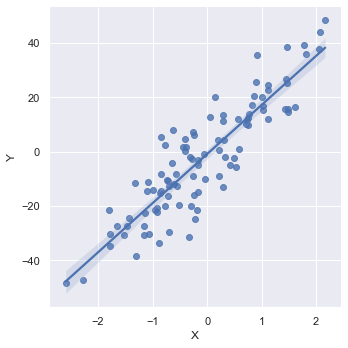

In [3]:
sns.set()

x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, coef=True)

df = pd.DataFrame(data={'X':x_train.ravel(), 'Y':y_train.ravel()})

sns.lmplot(x='X', y='Y', data=df, fit_reg=True)
plt.show()

x_torch = torch.FloatTensor(x_train)
y_torch = torch.FloatTensor(y_train)
y_torch = y_torch.view(y_torch.size()[0],1)

PyTorch 的 nn 库中有大量有用的模块，其中一个就是线性模块。如名字所示，它对输入执行线性变换，即线性回归。

In [4]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(slef, x):
        return self.linear(x)

model = LinearRegression(1,1)

要训练线性回归，我们需要从 nn 库中添加合适的损失函数。对于线性回归，我们将使用 MSELoss()——均方差损失函数。

我们还需要使用优化函数（SGD），并运行与之前示例类似的反向传播。本质上，我们重复上文定义的 train() 函数中的步骤。不能直接使用该函数的原因是我们实现它的目的是分类而不是回归，以及我们使用交叉熵损失和最大元素的索引作为模型预测。而对于线性回归，我们使用线性层的输出作为预测。

In [5]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(50):
    data, target = Variable(x_torch), Variable(y_torch)
    output = model(data)
    
    optimizer.zero_grad()
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    
predicted = model(Variable(x_torch)).data.numpy()

NameError: name 'Variable' is not defined

现在我们可以打印出原始数据和适合 PyTorch 的线性回归。

In [ ]:
plt.plot(x_train, y_train, 'o', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

为了转向更复杂的模型，我们下载了 MNIST 数据集至「datasets」文件夹中，并测试一些 PyTorch 中可用的初始预处理。PyTorch 具备数据加载器和处理器，可用于不同的数据集。数据集下载好后，你可以随时使用。你还可以将数据包装进 PyTorch 张量，创建自己的数据加载器类别。

批大小（batch size）是机器学习中的术语，指一次迭代中使用的训练样本数量。批大小可以是以下三种之一：

batch 模式：批大小等于整个数据集，因此迭代和 epoch 值一致；

mini-batch 模式：批大小大于 1 但小于整个数据集的大小。通常，数量可以是能被整个数据集整除的值。

随机模式：批大小等于 1。因此梯度和神经网络参数在每个样本之后都要更新。

In [ ]:
from torchvision import datasets, transforms
import torch

batch_num_size = 64

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.Compose(
                                                                [transforms.ToTensor(),
                                                                 transforms.Normalize((0.1307,),(0.38081,))
                                                                ])),
                                                                batch_size=batch_num_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data',train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), 
    batch_size=batch_num_size, shuffle=True)

3. PyTorch 中的 LeNet 卷积神经网络（CNN）

现在我们从头开始创建第一个简单神经网络。该网络要执行图像分类，识别 MNIST 数据集中的手写数字。这是一个四层的卷积神经网络（CNN），一种分析 MNIST 数据集的常见架构。该代码来自 PyTorch 官方教程，你可以在这里（http://pytorch.org/tutorials/）找到更多示例。

我们将使用 torch.nn 库中的多个模块：

1. 线性层：使用层的权重对输入张量执行线性变换；

2. Conv1 和 Conv2：卷积层，每个层输出在卷积核（小尺寸的权重张量）和同样尺寸输入区域之间的点积；

3. Relu：修正线性单元函数，使用逐元素的激活函数 max(0,x)；

4. 池化层：使用 max 运算执行特定区域的下采样（通常 2x2 像素）；

5. Dropout2D：随机将输入张量的所有通道设为零。当特征图具备强相关时，dropout2D 提升特征图之间的独立性；

6. Softmax：将 Log(Softmax(x)) 函数应用到 n 维输入张量，以使输出在 0 到 1 之间。

In [ ]:
import torch.nn as nn
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

创建 LeNet 类后，创建对象并移至 GPU：

In [ ]:
model = LeNet()
if cuda_gpu:
    model.cuda()

print ('MNIST_net model:\n')
print (model)

要训练该模型，我们需要使用带动量的 SGD，学习率为 0.01，momentum 为 0.5。

In [ ]:
ctierion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.005, momentum = 0.9)

仅仅需要 5 个 epoch（一个 epoch 意味着你使用整个训练数据集来更新训练模型的权重），我们就可以训练出一个相当准确的 LeNet 模型。这段代码检查可以确定文件中是否已有预训练好的模型。有则加载；无则训练一个并保存至磁盘。

In [ ]:
import os
epochs = 5
if (os.path.isfile('pretrained/MNIST_net.t7')):
    print('Loading model')
    model.load_state_dict(torch.load('pretrained/MNIST_net.t7', map_location=lambda storage, loc: stroage))
    acc, loss = test(model, 1, criterion, test_loader)
else:
    print('Training model')
    for epoch in range(1, epochs + 1):
        train(model, epoch, criterion, optimizer, train_loader)
        acc, loss = test(model, 1, criterion, test_loader)
    torch.save(model.state_dict(), 'pretrained/MNIST_net.t7')